# Масштабирование признаков

✍ Часто встречаются наборы данных, в которых разные столбцы имеют разные единицы измерения: например, один столбец может быть в килограммах, а другой — в сантиметрах. Кроме того, у нас могут быть такие столбцы, как price, который может варьироваться от 1 до 300 000 и даже больше, в то время как столбец weather изменяется от 29 до 71 (максимум). Таким образом, price примерно в 4000 раз больше, чем weather.

Но как мы можем быть уверены, что модель одинаково обрабатывает обе эти переменные? Когда мы подаём эти признаки в модель как есть, есть все шансы, что price больше повлияет на результат предсказания, например, года выпуска автомобиля, из-за большего значения параметра цены. Но это не обязательно означает, что данный параметр более важен как предиктор. Итак, чтобы придать значение как price, так и weather, нужно масштабирование признаков.

### Задание 5.1

Заполните пропуски в формулах StandardScaler, MinMaxScaler и RobustScaler.

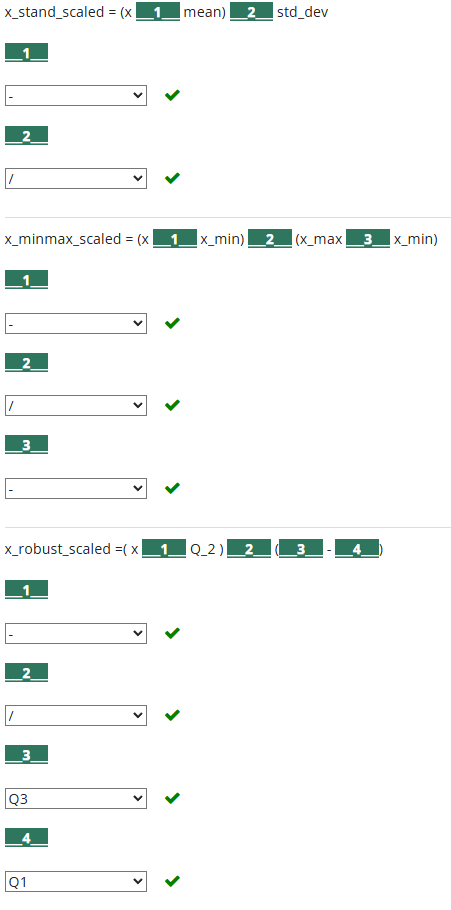

In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [53]:
data = pd.read_excel('data/data_ford_price.xlsx') 

Давайте посмотрим, как StandardScaler, MinMax и RobustScaler справятся с нашими данными. Для наглядности будем использовать три столбца.

In [54]:
data = data[['price', 'year', 'weather']]
data.dropna(inplace = True)
data_scaled = data.copy()
col_names = ['price', 'weather']
x = data_scaled[col_names]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
data_scaled[col_names] = scaler.fit_transform(x.values)
data_scaled

,price,year,weather
0,2.558728,2016,0.862068
1,0.067373,2009,-0.017965
2,-1.072197,2002,-0.897998
3,-1.176990,2000,-0.395122
5,-0.677579,2003,-0.269403
...,...,...,...
7012,0.682100,2015,0.862068
7013,-0.767025,2005,-0.269403
7014,-0.414149,2006,0.862068
7015,-0.335138,2011,-0.646560


In [31]:
from sklearn.metrics import mean_absolute_error

y = data_scaled['year']
x = data_scaled.drop(columns='year')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
 
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# MAE: 3.041

MAE: 3.041


После применения двух других скейлеров получится следующая таблица MAE:

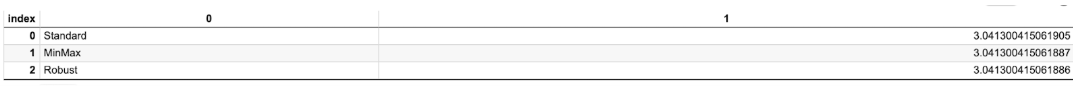

### Задание 5.2

Отмасштабируйте признак price с помощью *RobustScaler.*
В качестве ответа запишите результат выполнения кода data['price'][1]. Ответ **округлите до двух знаков после точки-разделителя.**

In [57]:
data = data[['price', 'year', 'weather']]
data.dropna(inplace = True)
data_scaled = data.copy()
col_names = ['price']
x = data_scaled[col_names]
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()
 
data_scaled = r_scaler.fit_transform(x.values)

In [60]:
data_scaled[1]

array([0.1894604])

### Задание 5.3

Выберите верные утверждения о скейлерах:

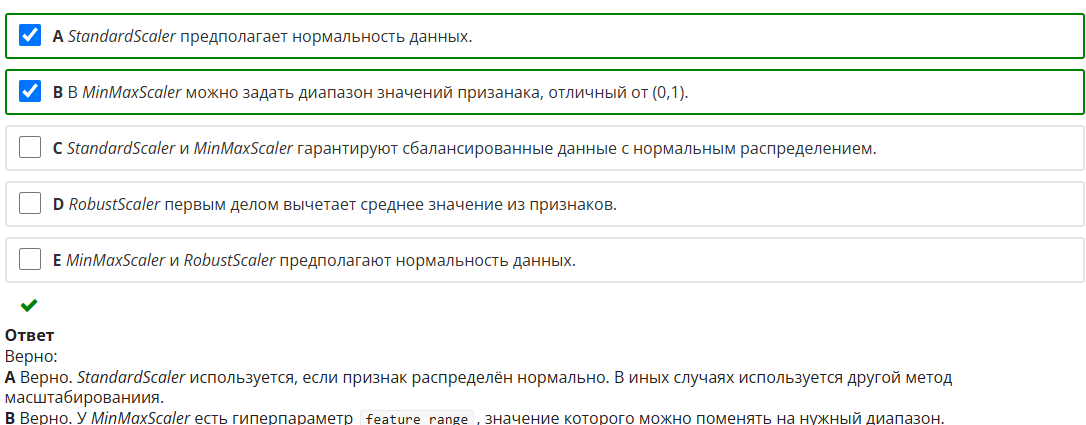